# Proyecto Final: Librería FinCal

Programacion II

Programa de Estudios Superiores

Banco de Guatemala

# Integrantes:

Marianna Guzmán 

Joaquín Gordillo Sajbín 

Luis Lemus Mackay

In [ ]:
graphics.off(); rm(list=ls());
ls()

# FinCal

Es un paquete para el cálculo del valor del dinero en el tiempo, análisis de series temporales y finanzas computacionales.

LIBRERÍA A UTILIZAR

FinCal está disponible en [CRAN] (http://cran.r-project.org/web/packages/FinCal/) 


In [1]:
install.packages("FinCal",dependencies=TRUE)
library("FinCal")

Installing package into 'C:/Users/IN_CAP02/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'FinCal' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IN_CAP02\AppData\Local\Temp\Rtmp6Nfz0c\downloaded_packages


La librería también se puede descargar directamente desde GitHub

In [2]:
library("devtools")
install_github("felixfan/FinCal") 

Loading required package: usethis




rlang   (0.4.2 -> 0.4.4) [CRAN]
stringi (1.4.4 -> 1.4.5) [CRAN]
vctrs   (0.2.1 -> 0.2.2) [CRAN]


Installing 3 packages: rlang, stringi, vctrs

Installing packages into 'C:/Users/Luis Mackay/Documents/R/win-library/3.6'
(as 'lib' is unspecified)




  There are binary versions available but the source versions are later:
        binary source needs_compilation
rlang    0.4.2  0.4.4              TRUE
stringi  1.4.4  1.4.5              TRUE

package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Luis Mackay\AppData\Local\Temp\RtmpGug5Hh\downloaded_packages


installing the source packages 'rlang', 'stringi'




ERROR: Error: Failed to install 'FinCal' from GitHub:
  (convertido del aviso) installation of package 'rlang' had non-zero exit status


FinCal cuenta con múltiples funciones. Para ver el listado o repertorio de las mismas, se puede utilizar el siguiente comando

In [4]:
ls("package:FinCal")

[1] "bdy"                   "bdy2mmy"               "candlestickChart"     
 [4] "cash.ratio"            "coefficient.variation" "cogs"                 
 [7] "current.ratio"         "ddb"                   "debt.ratio"           
[10] "diluted.EPS"           "discount.rate"         "ear"                  
[13] "ear.continuous"        "ear2bey"               "ear2hpr"              
[16] "EIR"                   "EPS"                   "financial.leverage"   
[19] "fv"                    "fv.annuity"            "fv.simple"            
[22] "fv.uneven"             "geometric.mean"        "get.ohlc.google"      
[25] "get.ohlc.yahoo"        "get.ohlcs.google"      "get.ohlcs.yahoo"      
[28] "gpm"                   "harmonic.mean"         "hpr"                  
[31] "hpr2bey"               "hpr2ear"               "hpr2mmy"              
[34] "irr"                   "irr2"                  "iss"                  
[37] "lineChart"             "lineChartMult"         "lt.d2e"               
[40] "mmy2hpr"               "n.period"              "npm"                  
[43] "npv"                   "pmt"                   "pv"                   
[46] "pv.annuity"            "pv.perpetuity"         "pv.simple"            
[49] "pv.uneven"             "quick.ratio"           "r.continuous"         
[52] "r.norminal"            "r.perpetuity"          "sampling.error"       
[55] "SFRatio"               "Sharpe.ratio"          "slde"                 
[58] "total.d2e"             "twrr"                  "volumeChart"          
[61] "was"                   "wpr"

Para obtener ayuda con alguna de las funciones se pueden emplear los siguientes comandos 

In [5]:
help(pv)    # display the documentation for the function
args(pv)    # see arguments of the function
example(pv) # see example of using the function

function (r, n, fv = 0, pmt = 0, type = 0) 
NULL


pv> pv(0.07,10,1000,10)
[1] -578.5851

pv> pv(r=0.05,n=20,fv=1000,pmt=10,type=1)
[1] -507.7427


Este link es una especie de manual o diccionario de todas la funciones https://cran.r-project.org/web/packages/FinCal/FinCal.pdf

A continuación se proporciona un ejemplo de algunas de las funciones empleando estos comandos. Se acompañan con una breve descripción en español.

Nota: Para todos los ejemplos los ingresos son positivos mientras que los egresos negativos. 

# Rendimiento de descuento bancario (BDY): 

La tasa de descuento bancario (o Discount Bank Yield en inglés) es una de las formas en las que se puede presentar la rentabilidad de un título de mercado monetario emitido al descuento.

Este descuento es la diferencia entre el precio de cotización y el valor nominal del título anualizado.

Cuando se adquiere un instrumento de mercado monetario emitido al descuento, el vendedor estipula la cantidad que será reembolsada al vencimiento y el comprador paga un precio menor. La diferencia entre esos dos precios sería lo que ganaría el inversor. Pero si calculamos así la rentabilidad, no estaríamos obteniendo una rentabilidad anualizada, que es la que se suele utilizar para medir la rentabilidad de estos activos.

Su fórmula es la siguiente RBD=(D/F)*(360/t)

Rbd = Rentabilidad anualizada utilizando la tasa de descuento bancaria.

D= Descuento sobre el valor nominal (se obtiene de restar al valor facial el precio de cotización del instrumento)

F= Valor facial del título.

t= Días hasta el vencimiento del título.

In [6]:
#help("bdy")    
args(bdy)    
example(bdy)

function (d, f, t) 
NULL


bdy> bdy(d=1500,f=100000,t=120)
[1] 0.045


Ejemplo: Se nos requiere calcular la tasa de descuento bancario de un bono cupón cero emitido al descuento. El precio del bono es de 978,5 € con un valor facial de 1.000 € y éste vence en 135 días.

In [7]:
bdy(d=1000-978.5, f=1000, t=135)

[1] 0.05733333

# Convirtiendo el RDB a Rendimiento del mercado monetario (MMY)

El rendimiento del mercado monetario es la tasa de rendimiento de las inversiones altamente líquidas con un vencimiento inferior a un año. Se calcula multiplicando el rendimiento del período de tenencia con un factor de 360/t donde t es el número de días entre la fecha de emisión y la fecha de vencimiento de la inversión.

In [8]:
#help("bdy2mmy")    
args(bdy2mmy)

function (bdy, t) 
NULL

¿Cuál es el rendimiento del mercado monetario para un T-Bill de 120 días que tiene un rendimiento de descuento bancario del 4.50%?

In [9]:
example(bdy2mmy)


bdy2mm> bdy2mmy(bdy=0.045,t=120)
[1] 0.04568528


# Tasa Anual Efectiva (EAR por sus siglas en inglés) 

La TEA es el indicador con el que se calcula la tasa de interés en el plazo de un año. Es importante comprender que este cálculo puede hacerse para conocer tanto la rentabilidad de una cuenta como el costo de un préstamo o crédito. Cuanto mayor sea la TEA, mayor será el interés que recibirás mientras ahorres tu dinero y, por ende, tus ahorros crecerán más. Por el contrario, mientras más alta sea la Tasa Efectiva Anual en un crédito, mayores serán los intereses que tendrás que pagar y más caro te saldrá el préstamo. 

In [10]:
#help("ear")    
args(ear)

function (r, m) 
NULL

Usando una tasa de 4.25%, calcule las tasas anuales efectivas para capitalización semestral, trimestral, mensual y diaria.

In [11]:
ear(0.0425, 2)
ear(0.0425, 4)
ear(0.0425, 12)
ear(0.0425, 365)

[1] 0.04295156

[1] 0.04318215

[1] 0.04333772

[1] 0.04341347

# Valor Futuro 

El valor futuro (VF) es el valor que tendrá en el futuro un determinado monto de dinero que mantenemos en la actualidad o que decidimos invertir en un proyecto determinado.

El valor futuro (VF) nos permite calcular cómo se modificará el valor del dinero que tenemos actualmente (en el día de hoy) considerando las distintas alternativas de inversión que tenemos disponibles. Para poder calcular el VF necesitamos conocer el valor de nuestro dinero es el momento actual y la tasa de interés que se le aplicará en los períodos venideros.

El Valor futuro se utiliza para evaluar la mejor alternativa en cuanto a qué hacer con nuestro dinero hoy. También para ver cómo cambia el valor del dinero en el futuro.


In [12]:
#help("fv.simple")    
args(fv.simple)

function (r, n, pv) 
NULL

Calcule el valor futuro de una inversión de $ 300 al final de diez años si obtiene una tasa de rendimiento compuesta anual del 8%.

Calcule el valor futuro de una inversión de $ 50,000 al final de veinte años si obtiene una tasa de rendimiento compuesta anual del 4%.

In [13]:
fv(0.08,10,-300)
fv(r=0.04,n=20,pv=-50000)

[1] 647.6775

[1] 109556.2

# Valor presente 

El valor presente (VP) es el valor que tiene a día de hoy un determinado flujo de dinero que recibiremos en el futuro.

Es decir, el valor presente es una fórmula que nos permite calcular cuál es el valor de hoy que tiene un monto de dinero que no recibiremos ahora mismo, sino más adelante.

In [14]:
#help("pv.simple")    
args(pv.simple)

function (r, n, fv) 
NULL

Dada una tasa de descuento del 7%, calcule el valor presente de un flujo de efectivo de $ 100,000 que se recibirá en diez años.

Dada una tasa de descuento del 3%, calcule el valor presente de un flujo de efectivo de $ 1,000,000 que se recibirá en tres años.

In [15]:
pv(0.07,10,100000)
pv(r=0.03,n=3,fv=1000000)

[1] -50834.93

[1] -915141.7

# Valor futuro de una anualidad ordinaria 

Definición de anualidad: Una anualidad es una serie de pagos que cumple con las siguientes condiciones:

Todos los pagos son de igual valor.

Todos los pagos se hacen a iguales intervalos de tiempo.

Todos los pagos son llevados al principio o al final de la serie a la misma tasa.

El número de pagos debe ser igual al número de periodos.

In [16]:
#help("fv.annuity")    
args(fv.annuity)

function (r, n, pmt, type = 0) 
NULL

¿Cuál es el valor futuro de una anualidad ordinaria que paga $ 15,000 por año al final de cada uno de los próximos 25 años, dado que se espera que la inversión obtenga una tasa de rendimiento del 6%?

In [17]:
fv.annuity(r = 0.06, n = 25, pmt = -15000, type = 0)

[1] 822967.7

¿Cuál es el valor futuro de una anualidad que paga $ 10,000 por año, al comienzo de cada uno de los próximos tres años, a partir de hoy, si los flujos de efectivo pueden invertirse a una tasa anual del 5%?

In [18]:
fv.annuity(r = 0.05, n = 3, pmt = -10000, type = 1)

[1] 33101.25

# Valor presente de una anualidad ordinaria 


In [19]:
#help("pv.annuity")    
args(pv.annuity)

function (r, n, pmt, type = 0) 
NULL

¿Cuál es el valor presente de una anualidad que paga $ 20,000 por año al final de cada uno de los próximos 25 años, dada una tasa de descuento del 6%?

In [20]:
pv.annuity(r = 0.06, n = 25, pmt = -20000, type = 0)

[1] 255667.1

Dada una tasa de descuento del 10%, ¿cuál es el valor presente de una anualidad de 10 años que realiza una serie de pagos de $ 1000 al comienzo de cada uno de los próximos tres años, a partir de hoy?

In [21]:
pv.annuity(r = 0.1, n = 10, pmt = -1000, type = 1)

[1] 6759.024

# Valor presente de una perpetuidad 

Es el valor de un flujo de pagos perpetuos, o que se estima no serán interrumpidos ni modificados nunca.

In [22]:
#help("pv.perpetuity")    
args(pv.perpetuity)

function (r, pmt, g = 0, type = 0) 
NULL

Una acción preferente que pagará $ 2.50 por año en dividendos anuales a partir del próximo año y planea seguir esta política de dividendos para siempre. Dada una tasa de rendimiento del 10%, ¿cuál es el valor de esta acción preferida hoy?

In [23]:
pv.perpetuity(r = 0.1, pmt = 2.5, type = 0)

[1] -25

# Tasa de retorno de una perpetuidad

In [24]:
#help("r.perpetuity")    
args(r.perpetuity)

function (pmt, pv) 
NULL

Utilizando las acciones preferidas descritas en el ejemplo anterior, determine la tasa de rendimiento que un inversor se daría cuenta si pagara $ 75 por acción por las acciones.

In [25]:
r.perpetuity(pmt = 2.5, pv = -75)

[1] 0.03333333

# Valor presente de los flujos de efectivo de un bono

In [26]:
#help("pv")    
args(pv)

function (r, n, fv = 0, pmt = 0, type = 0) 
NULL

Un bono realizará pagos de intereses de cupones de 70 HK (dólar hongkonés) (7% de su valor nominal) al final de cada año y también pagará su valor nominal de 1,000 HK al vencimiento en 10 años. Si la tasa de descuento apropiada es del 6%, ¿cuál es el valor presente de los flujos de efectivo prometidos del bono?

In [27]:
pv(r = 0.06, n = 10, fv = 1000, pmt = 70, type = 0)

[1] -1073.601

# Valor presente y futuro de un flujo de efectivo desigual 

Cuando una corriente de flujo de efectivo es desigual, el valor presente (PV) y/o el valor futuro (FV) de la corriente se calculan al encontrar la PV o FV de cada flujo de efectivo individual y sumarlos.

Una corriente de flujos de efectivo es desigual cuando:Todos los montos en la serie de flujos de efectivo no son iguales, y/o hay un tiempo desigual entre dos flujos de efectivo.

In [28]:
#help("fv.uneven")    
args(fv.uneven)

function (r, cf) 
NULL

Utilizando una tasa de rendimiento del 6%, calcule el valor futuro del flujo de efectivo desigual de 6 años que se produjo al final de cada año. (-10000,-5000, 2000, 4000, 6000, 8000)

In [29]:
fv.uneven(r = 0.06, cf = c(-10000, -5000, 2000, 4000, 6000, 8000))

[1] -1541.791

In [30]:
#help("pv.uneven")    
args(pv.uneven)

function (r, cf) 
NULL

Calcule el valor presente de este flujo de caja desigual de 6 años descrito anteriormente utilizando una tasa de rendimiento del 10%.

In [31]:
pv.uneven(r = 0.1, cf = c(-10000, -5000, 2000, 4000, 6000, 8000))

[1] 747.1377

# Cálculo del pago del préstamo

In [32]:
#help("pmt")    
args(pmt)

function (r, n, pv, fv, type = 0) 
NULL

Una compañía planea pedir prestados $ 500,000 por cinco años. El banco de la compañía prestará el dinero a una tasa del 6% y exige que el préstamo se pague en cinco pagos iguales de fin de año. Calcule el monto del pago que la compañía debe hacer para amortizar completamente este préstamo en cinco años.

In [33]:
pmt(r = 0.06, n = 5, pv = 5e+05, fv = 0, type=0)

[1] -118698.2

# Calcular el número de períodos en una anualidad

In [34]:
#help("n.period")    
args(n.period)

function (r, pv, fv, pmt, type = 0) 
NULL

¿Cuántos pagos de 1000 a fin de año son requeridos para acumular 10,000 si la tasa de descuento es del 9%?

In [35]:
n.period(r = 0.09, pv = 0, fv = 10000, pmt = -1000, type = 0)

[1] 7.448028

# Calcular la tasa de rendimiento por un período

In [36]:
#help("discount.rate")    
args(discount.rate)

function (n, pv, fv, pmt, type = 0) 
NULL

Suppose you have the opponunity to invest 1000 at the end of each of the next five years in exchange for $6000 at the end of the fifth year. What is the annual rate of return on this investment?

In [37]:
discount.rate(n = 5, fv = 6000, pmt = -1000, pv = 0, type = 0)

[1] 0.09130091

# Cálculo del Valor Presente Neto (NPV por sus siglas en inglés)

El valor presente neto (VPN) de un proyecto representa el cambio en el patrimonio neto/patrimonio de una empresa que resultaría de la aceptación del proyecto a lo largo de su vida. Es igual al valor presente de las entradas netas de efectivo del proyecto menos el desembolso de inversión inicial. Es una de las técnicas más confiables utilizadas en el presupuesto de capital porque se basa en el enfoque de flujo de efectivo descontado.

Los cálculos del valor presente neto requieren las siguientes tres entradas:

Flujos de efectivo netos proyectados después de impuestos en cada período del proyecto.

Desembolso de inversión inicial

Tasa de descuento adecuada, es decir, la tasa de obstáculo.

In [38]:
#help("npv")    
args(npv)

function (r, cf) 
NULL

Ejemplo: 

Calcule el VPN de un proyecto de inversión que tiene un costo inicial de 6 millones y un flujo de efectivo positivo de 2.6 millones al final del año 1, 2.4 millones al final del año 2 y 3.8 millones al final del año 3. Use una tasa de descuento del 8%.  

In [39]:
npv(r = 0.08, cf = c(-6, 2.6, 2.4, 3.8))

[1] 1.481583

# Tasa interna de rendimiento (TIR)

En el presupuesto de capital, el conflicto entre VPN y TIR se refiere a una situación en la cual el método de VPN clasifica los proyectos de manera diferente al método de TIR. En caso de tal diferencia, una empresa debe aceptar proyectos con mayor VPN.

El valor actual neto (VAN o VPN) y la tasa interna de rendimiento (TIR) son dos de las técnicas de análisis de inversión y presupuesto de capital más utilizadas. Son similares en el sentido de que ambos son modelos de flujo de efectivo descontados, es decir, incorporan el valor temporal del dinero. Pero también difieren en su enfoque principal y sus fortalezas y debilidades. El VPN es una medida absoluta, es decir, es la cantidad en dólares de valor agregado o perdido al emprender un proyecto. La TIR, por otro lado, es una medida relativa, es decir, es la tasa de rendimiento que ofrece un proyecto a lo largo de su vida útil.

In [40]:
#help("irr")    
args(irr)

function (cf) 
NULL

Ejemplo:
¿Cuál es la TIR de la inversión descrita en el ejemplo anterior?

In [41]:
irr(cf = c(-6, 2.6, 2.4, 3.8))

irr(cf=c(-5, 1.6, 2.4, 2.8))

[1] 0.2032579

[1] 0.1551911

# Cálculo del rendimiento del período de tenencia 

El rendimiento del período de tenencia es el rendimiento total ganado en una inversión durante todo su período de tenencia expresado como un porcentaje del valor inicial de la inversión. Se calcula como la suma de la ganancia de capital y los ingresos divididos por el valor de apertura de la inversión.

Hay dos fuentes de rendimiento para cualquier inversión en bonos, acciones, bienes raíces, etc.: (a) ganancia de capital e (b) ingresos. La ganancia o pérdida de capital resulta del movimiento en el valor de la inversión desde la fecha decompra hasta la fecha en que se calcula el rendimiento del período de tenencia. El ingreso resulta de pagos de cupones, dividendos, alquileres, etc.

El rendimiento del período de mantenimiento no es una medida estandarizada de rendimiento. Un período de espera dado puede ser por un solo día o un período de 5 años y no lo sabremos. La comparación entre el rendimiento del período de tenencia de diferentes inversiones directamente no es apropiada. Necesitamos averiguar el tiempo total durante el cual se calcula el rendimiento y luego convertirlo al rendimiento del período de tenencia anualizado.

In [42]:
#help(hpr)
args(hpr)

function (ev, bv, cfr = 0) 
NULL

Ejemplo: 

Supongamos que una acción se compra por 3 y se vende por 4 seis meses después, tiempo durante el cual pagó 0,50 en dividendos. ¿Cuál es el retorno del período de retención?

In [43]:
hpr(ev = 4, bv = 3, cfr = 0.5)

[1] 0.5

# Convetir el retorno del período de tenencia a la tasa anual efectiva

In [44]:
#help(hpr2ear)
args(hpr2ear)

function (hpr, t) 
NULL

Calcule la tasa efectiva anual usando el retorno del periodo de 120 días de 2.85%

In [45]:
hpr2ear(hpr = 0.0285, t = 120)

[1] 0.08923453

# La tasa de rendimiento ponderada en el tiempo (TWR) 

Es una medida de la tasa de crecimiento compuesta en una cartera. La medida TWRa menudo se usa para comparar los retornos de las inversiones porque elimina los efectos distorsionadores sobre las tasas de crecimiento creados por las entradas y salidas de dinero. El rendimiento ponderado en el tiempo divide el rendimiento de una cartera de inversiones en intervalos separados en función de si se agregó o retiró dinero del fondo.

La medida de rendimiento ponderada en el tiempo también se denomina rendimiento medio geométrico, que es una forma complicada de afirmar que los rendimientos de cada subperíodo se multiplican entre sí.

In [46]:
#help(twrr)
args(twrr)

function (ev, bv, cfr) 
NULL

Ejemplo: 

Un inversionista compra una acción en t = 0 por 200. Al final del año (en t = 1) el inversionista compra una acción adicional de la misma acción, esta vez por 220. Luego vende ambas acciones al final del segundo año por 230 cada uno. También recibió dividendos anuales de 3 por acción al final de cada año. Calcule la tasa de rendimiento anual ponderada en el tiempo de su inversión

Primero, desglosamos el período de 2 años en dos períodos de 1 año:

Periodo 1:
    
Valor inicial = 200

Dividendos pagados = 3

Valor final = 220

Periodo 2:
    
Valor inicial = 440 (2 acciones * 220)

Dividendos pagados = 6 (2 acciones * 3)

Valor final = 460 (2 acciones * 230)

In [47]:
twrr(ev=c(220,2*230), bv=c(200,2*220), cfr=c(3,2*3))

[1] 0.08668595

# Convirtiendo entre Tasa Efectiva Anual (EAR), rendimiento del periodo de tenencia (HPR) y Rendimiento del mercado monetario (MMY)

Suponga que el precio de un bono del tesoro de 10.000  que vence en 150 días es de 9.800. El rendimiento del mercado monetario cotizado es 4.898%. Calcule la tasa efectiva anual y el rendimiento anual.

In [48]:
mmy2hpr(mmy = 0.04898, t = 150)
hpr(ev = 10000, bv = 9800)
hpr2ear(hpr = mmy2hpr(mmy = 0.04898, t = 150), t = 150)
ear2hpr(ear = hpr2ear(hpr = mmy2hpr(mmy = 0.04898, t = 150), t = 150), t = 150)

[1] 0.02040833

[1] 0.02040816

[1] 0.05038874

[1] 0.02040833

# Cálculo del Rendimiento equivalente de bonos - BEY

El rendimiento equivalente de bonos (BEY) permite que los valores de renta fija cuyos pagos no sean anuales se puedan comparar con valores con rendimientos anuales. El BEY es un cálculo para reexpresar los rendimientos de bonos o notas con descuento semestral, trimestral o mensual en un rendimiento anual, y es el rendimiento cotizado en los periódicos. 

Las empresas pueden recaudar capital de dos maneras principales: deuda o capital. El patrimonio se distribuye a los inversores en forma de acciones ordinarias; ocupa el segundo lugar de la deuda en caso de quiebra o incumplimiento, y puede no proporcionar al inversor un rendimiento si la empresa falla. Por el contrario, la deuda se considera más barata para la empresa y es más segura que el capital para los inversores. Aún así, la deuda debe ser pagada por la empresa, independientemente del crecimiento de las ganancias. De esta manera, proporciona un flujo de ingresos más confiable para el inversionista de bonos.

Sin embargo, no todos los bonos son iguales. La mayoría de los bonos pagan a los inversores pagos de intereses anuales o semestrales. Algunos bonos, denominados bonos de cupón cero, no pagan intereses en absoluto, sino que se emiten con un profundo descuento a la par. El inversor obtiene un rendimiento cuando vence el bono. Para comparar el rendimiento de los valores descontados con otras inversiones en términos relativos, los analistas utilizan la fórmula de rendimiento equivalente de bonos.

In [49]:
#help(hpr2bey)
args(hpr2bey)

function (hpr, t) 
NULL

# Ejemplo:

¿Cuál es el rendimiento sobre una base equivalente a bonos de un préstamo a 3 meses que tiene un rendimiento del 4% en el período de tenencia?

In [50]:
hpr2bey(hpr = 0.04, t = 3)

[1] 0.1632

In [51]:
#help("ear2bey")
args(ear2bey)

function (ear) 
NULL

¿Cuál es el rendimiento sobre una base equivalente de bonos de una inversión con un rendimiento anual efectivo del 6%?

In [52]:
ear2bey(ear = 0.06)

[1] 0.05912603

# Cálculo de la media ponderada como retorno de cartera

In [53]:
#help(wpr)
args(wpr)

function (r, w) 
NULL

Una cartera consta de 40% de acciones ordinarias, 50% de bonos y 10% de efectivo. Si el rendimiento de las acciones ordinarias es del 9%, el rendimiento de los bonos es del 6% y el rendimiento del efectivo es del 1%, ¿cuál es el rendimiento de la cartera?

In [54]:
wpr(r = c(0.09, 0.06, 0.01), w = c(0.4, 0.5, 0.1))

[1] 0.067

# Retorno medio geométrico

La tasa geométrica de rentabilidad es especialmente útil para medir la rentabilidad media de las operaciones financieras en las que las revalorizaciones o desvalorizaciones son acumulativas. Por tanto, esta medida es la adecuada y correcta en lugar de la rentabilidad media calculada, como es más habitual, mediante la media simple o aritmética. La tasa geométrica de rentabilidad se corresponde con la rentabilidad que se deduciría mediante la aplicación de la capitalización compuesta

La rentabilidad geométrica o tasa geométrica de rentabilidad (TGR) se utiliza para conocer la rentabilidad de los activos financieros de la empresa de una forma más real a lo largo del tiempo que a través de una media aritmética. Sirve para conocer la rentabilidad de aquellos activos que hayan sufrido revalorizaciones o desvalorizaciones de forma acumulativa.

La tasa de rentabilidad geométrica coincide con la rentabilidad que el inversor obtiene tras aplicar la capitalización compuesta en su inversión.

In [55]:
#help("geometric.mean")
args(geometric.mean)

function (r) 
NULL

# Ejemplo: 

Durante los últimos tres años, los rendimientos de las acciones ordinarias de Acme Corporation han sido de -5%, 11% y 9%. Calcule la tasa de rendimiento anual compuesta durante el período de 3 años.

In [56]:
geometric.mean(r = c(-0.05, 0.11, 0.09))

[1] 0.04750883

# Calcular el costo promedio con la media armónica

In [57]:
#help("harmonic.mean")
args(harmonic.mean)

function (p) 
NULL

Un inversor compra 10,000 acciones cada mes, y en los últimos tres meses los precios pagados por acción fueron 4.5, 5.2 y 4.8. ¿Cuál es el costo promedio por acción de las acciones adquiridas?

In [58]:
harmonic.mean(p = c(4.5, 5.2, 4.8))

[1] 4.816467

# Costo de venta bajo 3 métodos diferentes

Una de las principales decisiones contables que deben tomar las empresas que venden productos es qué método utilizar para registrar el costo de los gastos de venta de bienes, que es la suma de los costos de los productos vendidos a los clientes durante el período. Se deduce el costo de los bienes vendidos de los ingresos por ventas para determinar el margen bruto. El costo de los bienes vendidos es una cifra muy importante porque si el margen bruto es incorrecto, el beneficio final (ingreso neto) es incorrecto.

Los costos del producto se ingresan en la cuenta del activo de inventario en el orden en que se adquirieron, pero no necesariamente se sacan de la cuenta del activo de inventario en el mismo orden. Puede elegir entre varios métodos para registrar el costo de los bienes vendidos y el saldo de costos que permanece en su cuenta de activos de inventario:

El método FIFO (primero en entrar, primero en salir): Usted cobra los costos del producto al costo de los bienes vendidos en el orden cronológico en el que los adquirió. El procedimiento es así de simple. Es como si las primeras personas en la fila que vieran una película entraran al cine primero. El tomador de boletos recoge los boletos en el orden en que fueron comprados.


El método LIFO (último en entrar, primero en salir): La característica principal del método LIFO es que selecciona el último artículo que compró primero y luego funciona hacia atrás hasta que tenga el costo total por el número total de unidades vendidas durante el período.


El método de costo promedio: en comparación con los métodos FIFO y LIFO, el método de costo promedio parece ofrecer lo mejor de ambos mundos. Los costos de muchas cosas en el mundo de los negocios fluctúan, por lo que puede decidir centrarse en el costo promedio del producto durante un período de tiempo. Además, el promedio de los costos de los productos durante un período de tiempo tiene un efecto de suavización deseable que evita que el costo de los bienes vendidos dependa demasiado de los cambios bruscos de una o dos adquisiciones.

In [59]:
cogs(uinv=2,pinv=2,units=c(3,5),price=c(3,5),sinv=7,method="FIFO")
cogs(uinv=2,pinv=2,units=c(3,5),price=c(3,5),sinv=7,method="LIFO")
cogs(uinv=2,pinv=2,units=c(3,5),price=c(3,5),sinv=7,method="WAC")

$costOfGoods
[1] 23

$endingInventory
[1] 15

$costOfGoods
[1] 31

$endingInventory
[1] 7

$costOfGoods
[1] 26.6

$endingInventory
[1] 11.4

# Ejemplos prácticos 

In [3]:
# Instalemos la libreria "readxl" 
#install.packages("readxl")
library(readxl)
library("FinCal")

# Cálculo del VPN y la TIR

In [4]:
Wacc = 0.1419

datos.desde.xls  <- read_excel("Datos2.xlsx") 
datos.desde.xls

# Definimos esta variable como el flujo de caja del Proyecto 1
fcn=datos.desde.xls$`FCN`
fcn

New names:
* Depreciaciones -> Depreciaciones...6
* Depreciaciones -> Depreciaciones...16



Año,Ventas,Costos (Balance Personal),Utilidad marginal,Gastos (Mantenimiento),Depreciaciones...6,UAII,Intereses(16.5%),Utilidad antes de impuestos,Impuestos (25%),Utilidad Neta,Inversiones*,Amortizaciones,Préstamos,Venta de activos,Depreciaciones...16,FCN
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,653550,NA,98032.5,NA,NA,-555517.50
1,372000,275100,96900,9644,53153.33,34102.67,16175.363,17927.30,0.00,17927.30,0,19606.5,NA,0.000,53153.33,51474.14
2,405000,275100,129900,9644,53153.33,67102.67,12940.290,54162.38,13540.59,40621.78,120550,19606.5,NA,0.000,53153.33,-46381.38
3,405000,275100,129900,9644,53153.33,67102.67,9705.218,57397.45,14349.36,43048.09,4600,19606.5,NA,1533.333,53153.33,73528.25
4,405000,275100,129900,9644,53153.33,67102.67,6470.145,60632.52,15158.13,45474.39,0,19606.5,NA,0.000,53153.33,79021.22
5,405000,275100,129900,9644,53153.33,67102.67,3235.073,63867.59,15966.90,47900.70,258100,19606.5,NA,51620.000,53153.33,-125032.47


[1] -555517.50   51474.14  -46381.38   73528.25   79021.22 -125032.47

In [5]:
# Retorna el valor presente de el flujo de caja
pv.uneven(r = Wacc, cf = fcn)
# Regresa la tasa interna de retorno del Proyecto 1
irr(fcn)

[1] 450609.7

[1] -1.000105

# Cálculo del pago del préstamo 

In [5]:
# Comparación de dos estructuras de deuda utilizando la funcion PMT
#Estructura de 50% de prestamo y 50% financiamiento propio
pmt(r = 0.165, n = 5, pv = -326775, fv = 0, type=0)

[1] 100966.6

In [6]:
#Estructura de 15% de prestamo y 85% financiamiento propio.
pmt(r = 0.165, n = 5, pv = -98033, fv = 0, type=0)

[1] 30290.15

# Evaluación y selección de proyectos

In [7]:
#Importamos desde excel los flujos de efectivo de 3 diferentes proyectos.
#Cada proyecto tiene una distinta inversión inicial
datos.desde.xls3  <- read_excel("Proyectos.xlsx") 
datos.desde.xls3

#Cargamos los datos de cada Proyecto
PA=datos.desde.xls3$`PROYECTO A`
PA

PB=datos.desde.xls3$`PROYECTO B`
PB

PC=datos.desde.xls3$`PROYECTO C`
PC

AÑO,PROYECTO A,PROYECTO B,PROYECTO C
<dbl>,<dbl>,<dbl>,<dbl>
0,-1e+07,-2e+07,-1.6e+07
1,0e+00,4e+06,5.0e+06
2,6e+06,5e+06,8.0e+06
3,6e+06,6e+06,3.0e+06
4,8e+06,8e+06,3.0e+06


[1] -1e+07  0e+00  6e+06  6e+06  8e+06

[1] -2e+07  4e+06  5e+06  6e+06  8e+06

[1] -1.6e+07  5.0e+06  8.0e+06  3.0e+06  3.0e+06

In [8]:
#Valor presente neto de los tres proyectos dado una tasa de descuento.
VANPA=npv(0.07,PA)
VANPB=npv(0.07,PB)
VANPC=npv(0.07,PC)
VANPA
VANPB
VANPC

[1] 6241581

[1] -893539.6

[1] 397986.3

In [9]:
#Un inversionista puede comparar los diferentes proyectos para decidir en cual invertir
max(c(VANPA,VANPB,VANPC))

[1] 6241581

# Media ponderada del retorno de una cartera en especifico.


In [10]:
Retornos= c(0.4,0.7,0.9)
Portafolios = c(0.1, 0.4, 0.5)

wpr(r=Retornos, w=Portafolios)

[1] 0.77

# Simulacion proceso AR(1) sobre el precio de mercado de computadoras

Por ejemplo una compañia estudia la introduccion de un nuevo producto: computadoras

Entre los elementos de simulacion se pueden incluir:

Cantidad de unidades a producir

Precio de mercado

Costos unitarios de produccion

Costos unitarios de venta

Precio de compra de maquinaria para fabricar nuevo producto

Costo de capital



In [11]:
#Parametros

nSim=10000 #Numero de simulaciones
nT=10 #Numero de periodos del cashflow
tasa_desc=0.18 #Tasa de descuento (costo de capital)

In [12]:
#Funcion para calcular el cash flow

#q= cantidad ofertada
#p= precio de mercado del producto
#cp= costo unitario de produccion
#cv= costo unitario de ventas
#kT= cambio en el capital de trabajo
#ISR= tasa fiscal
#dep= depreciacion de maquinaria

cash_flow=function(q,p,cp,cv,kT,ISR,dep) {
    FCN = (q*p-q*(cv+cp)-dep)*(1-ISR)+dep-kT
    return(FCN) #Devuelve el cash flow de un periodo
}

In [13]:
#Como no podemos definir nuestro precio de mercado, se hace un proceso AR(1) 
#sobre el precio historico del producto

#Obtenemos de excel los precios historicos de computadoras 
#con una periodicidad mensual de febrero 1992 a noviembre 2019
#un total de 334 observaciones


Datos=read.csv("Precio_electronicos.csv")
#Definimos nuestro precio como todos los datos de la columna correspondiente a
#los precios de computadoras
Precio=Datos$A34HNO

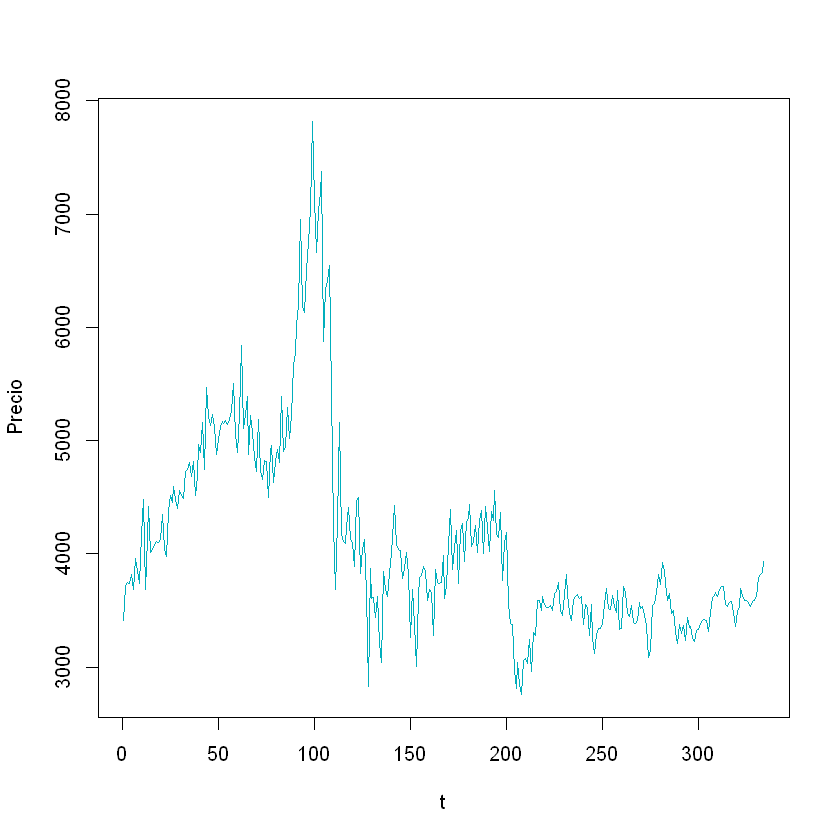

In [14]:
#Graficamos los precios de las computadoras
plot(Precio,type="l",xlab="t",col="#00aebc")

In [15]:
#Calculamos un AR(1)
Modelo_AR= ar.ols(Precio,aic=TRUE,order.max=1)
Modelo_AR


Call:
ar.ols(x = Precio, aic = TRUE, order.max = 1)

Coefficients:
     1  
0.9411  

Intercept: 1.603 (16.15) 

Order selected 1  sigma^2 estimated as  86861

In [16]:
#El modelo AR(1) de los precios es: Yt= intercepto + rho*Yt-1+epsilont

#Le damos el valor al intercepto del Modelo AR(1)
intercepto=Modelo_AR$x.intercept

#Le damos valor al coeficiente del Modelo AR(1)
rho=Modelo_AR$ar

#El numero de observaciones usadas para estimar el Modelo AR(1)
obs=Modelo_AR$n.obs

#Definimos a sigma del error como la desv estandar de los residuos
sigma=sd(Modelo_AR$resid[2:obs])

In [17]:
#Funcion para simular el precio de computadoras
simular_AR1=function(intercept,rho_sim){
    epsilon_sim=rnorm(1,mean=0,sd=sigma) #Simulamos epsilon
    y=intercept+rho_sim*Precio[obs]+epsilon_sim
    
    return(y)
}

Precio_sim=simular_AR1(intercepto,rho)
Precio_sim

, , 1

         [,1]
[1,] 3680.485

# SIMULACION DE VPNs DE DISTINTOS ESCENARIOS DEL PROYECTO 

In [18]:
#Vector vacio donde se van a guardar los VPNs
vec_vpn=rep(NaN,nSim)

#Vector vacio donde se van a guardar las diferentes inversiones iniciales
inv_inic= rep(NaN,nSim)

In [19]:
#Para cada simulacion
for (t in 1:nSim){
    #Sabemos que nuestra inversion inicial estara entre 100,000 y 1,000,000
    inv_inic[t]=sample(100000:1000000,1) #Simulamos la inversion inicial
    #Vector vacio en donde se va a guardar cada cashflow por el numero de periodos nT
    vec_cashflow=rep(NaN,nT)
    #El primer elemento del cashflow va a ser la inversion inicial pero en negativo
    vec_cashflow[1]=-inv_inic[t]
    #La depreciacion es el 20% de la inversion (maquinaria que vamos a comprar)
    depreciacion=-vec_cashflow[1]*0.2
    #El impuesto
    ISR=0.25
    for (i in 2:nT){
        #Simulamos las siguientes variables:
        #Sabemos que la cantidad del producto a ofertar va a estar entre 1,000 y 700 unidades al año
        q=cantidad=sample(100:700,1)
        #Sabemos el rango de nuestro cambio en el capital de trabajo
        ckt=cambio_Ktrabajo=sample(-2000:2000,1)
        #Como no podemos definir nuestro precio de mercado, se simula el precio de mercado
        p=simular_AR1(intercepto,rho)
        #Sabemos que nuestro costo unitario de produccion es el 60% del precio
        cp=costo_unitario_prod=0.60*p
        #Sabemos que nuestro costo unitario de venta es el 25% del precio
        cv=costo_unitario_venta=0.25*p
        #Cada cashflow se agrega al vector de cash flows de nT periodos
        vec_cashflow[i]=cash_flow(q,p,cp,cv,ckt,ISR,depreciacion)
    }
    #Se calcula el VPN para cada vector de cashflows para 10,000 simulaciones
    vec_vpn[t]=npv(r=tasa_desc,cf=vec_cashflow)
}

In [20]:
vec_vpn

[1]  262127.62597  768036.82713  357341.85622  149894.74957  189726.73148
    [6]  149120.25032  270891.38239   85559.22506  -97766.39650  435764.45205
   [11]  146525.00558  257105.74587  146943.96487  541455.90314  324101.50566
   [16]  261405.87757  254363.11049  672308.31081  375208.65372  442769.89518
   [21]   90278.82158  471134.98008  621368.18987  122698.16953   14187.36032
   [26]  210329.23365  123095.82616  267279.63351   89270.78662   31473.91926
   [31]  375431.93409  479610.47883  254140.03268  309579.08253  -69749.60385
   [36]  405678.71038  161551.71900  471065.50363  -39049.28810   67337.02290
   [41]  263659.66549  366637.94774 -254094.99966  409188.58684  399456.11867
   [46]  271673.91032   50651.59348  235129.85463  121227.66089  122076.48086
   [51]  498598.13154  655419.72610  310009.33974  731099.49077  108813.81200
   [56]  517674.22417  252613.42519  206126.27898  153229.80174  598608.88789
   [61]  538465.12421  118453.02226  356189.05705  442839.48504  321248.16848
   [66]  288878.80876  536529.80227  367039.51679  255952.61673   86992.68050
   [71]    9469.00268  394027.87451  548849.01427  311619.40480  115906.86963
   [76]  -66774.48526  498688.20559  667052.82007  -99463.61879  744607.64877
   [81]  393343.53565  205812.73932  337979.29841  313213.36551  543298.48234
   [86]  136352.89647   -2254.83640  416807.58292   34168.80626   65649.43828
   [91]  -15034.45372  388746.38032  280851.59884  -41440.71754  133864.41026
   [96]  142074.23720  542303.79412  -39604.70736  128071.08257  158065.93340
  [101]  725386.65027 -106615.27984  705718.97817  -42564.74556  593922.91407
  [106] -148631.02881   77671.80787  471242.23563  107268.89510  302601.57183
  [111]  414327.41893 -139670.63510  102653.53818  472653.87186  126368.60216
  [116]   82419.03514  261830.73483  341764.88154  278486.19425  489628.00511
  [121]  562145.09933  326879.37874  658635.22907  204340.44192  329719.58172
  [126]  216943.05228  253060.05550  389792.98808  -25480.41670  310949.56027
  [131]  531307.48136   94303.26253  766285.61921  637409.69923  362614.88891
  [136]   86284.71659  534125.27536  654547.93303   97454.41031  186002.03500
  [141]   22307.52838  185331.04682  596929.69485  297256.35509  674136.46933
  [146]  166159.74337  237585.49611  340274.48085  -12534.04189  -34376.41153
  [151]  477682.01452    -275.55114  285062.40609  487673.12239  639674.60879
  [156]  643245.49558  107612.25143  324236.17464  512070.46799  282592.79945
  [161]  195846.33288  117510.98635   94967.39621  462823.52917  184168.20990
  [166]  158506.94053  763938.40105  441003.35840  594938.07180  162010.23921
  [171]  278194.34179  194932.96738  412346.74620  -27323.76499  693119.30579
  [176]  -72171.66855   95353.16258  -26261.75236  708192.77892  359098.75850
  [181]  256426.89446  427608.16313   62387.11684  223487.88631  288867.99695
  [186]  182451.73775  543493.75469  362134.90011  421759.12509  233575.48996
  [191]  549035.70651  -11277.94017  339514.65122  335254.18638  677248.42288
  [196]  279427.07262 -263526.90187  191535.32445   65125.26661  332428.28513
  [201]  476461.04115  591352.80196  158893.95255   22856.04952  173531.17447
  [206]  588331.05039  126437.12245  534265.78287   40151.74428  554116.83871
  [211]  279516.51564  120187.16160  645421.75881  590813.64473   31751.18211
  [216]  545446.81933  441220.34878 -283471.66941  421048.79470  306217.90538
  [221]  543918.72610  681988.11244  414887.82052  423008.59604  248855.55619
  [226] -222090.20274  176014.73855  282111.54449  163458.66758   20039.03035
  [231]  575383.34802  222126.00567  232231.80150  556638.00742  111962.68555
  [236]  632326.35998  280438.87767  397085.61620  481519.37350  581970.91893
  [241]  360488.87154  115518.39171  503757.46766  162083.61454  660650.72483
  [246]  625785.32950  406370.95434  691923.15875  198369.56921  315452.50725
  [251]  301288.44758  492459.90911  432569.56518  530035.68752  728967.13750
  [256]  268051.58867  416

[1] 284684.1

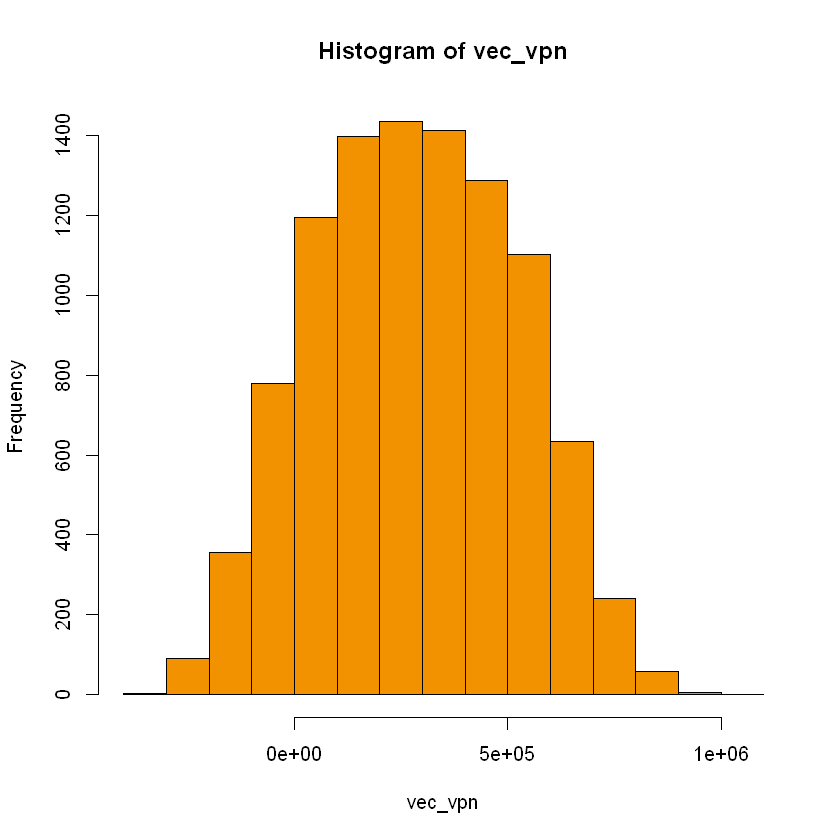

In [21]:
#Media de VPNs 
mean(vec_vpn)

#Graficamos la distribucion de los VPNs
hist(vec_vpn,col="#f39200")

In [22]:
#Vector vacio donde se va a guardar 1 si el VPN es positivo y 0 si es negativo
vec_prob=rep(NaN,nSim)

#Funcion de probabilidad que el VPN sea menor a un numero
Menor = function(a){
    for (i in 1:nSim) {
        if (vec_vpn[i] < a)
            vec_prob[i]=1
        else
            vec_prob[i]=0
    }
    Probabilidad = sum(vec_prob)/nSim
    return(Probabilidad)
}

#La probabilidad que el VPN sea negativo
Menor(0)

[1] 0.1228

In [23]:
#Funcion de probabilidad que el VPN sea mayor a un numero
Mayor = function(a){
    for (i in 1:nSim) {
        if (vec_vpn[i] > a)
            vec_prob[i]=1
        else
            vec_prob[i]=0
    }
    Probabilidad = sum(vec_prob)/nSim
    return(Probabilidad)
}

#La probabilidad que el VPN sea positivo
Mayor(0)

#La probabilidad que el VPN sea mayor a 500,000
Mayor(500000)


[1] 0.8772

[1] 0.2042

# EJEMPLO ANALISIS SENSIBILIDAD #
# Variable: Precio del Producto #

In [24]:
vec_vpn2=rep(NaN,nSim) #Creamos un vector que va a guardar todos los VPN por cada simulacion

inv_ini2=-sample(50000:200000,1) #Esta es la inversion inicial
q2=sample(100:700,1)
p2=simular_AR1(intercepto,rho)
cp2=0.60*p2 #Costo unitario de producción FIJO
cv2=0.25*p2 #Costo unitario por venta FIJO
ckt2=sample(-2000:2000,1) #Cambio de capital trabajo FIJO
depreciacion2=-inv_ini2*0.2 #Esta es la depreciacion de la maquinaria que se va a comprar con la inversion inicial
ISR=0.25

vec_precio=rep(NaN,nSim)

In [25]:
for (t in 1:nSim){
    vec_cashflow=rep(NaN,nT) #En este vector se guarda cada cashflow por la cantidad de periodos
    vec_cashflow[1]=-inv_ini2 #Valor inicial de la inversión
    vec_precio[t]=simular_AR1(intercepto,rho) #Vector de precios que se simulara para el analisis de sensibilidad
    
    for (i in 2:nT){
        
        #Agregamos al vector de cashflows el calculo del cashflow por cada periodo (nT)    
        vec_cashflow[i]=cash_flow(q2,vec_precio[t],cp2,cv2,ckt2,ISR,depreciacion2)
        
        
    }
    #Agregamos al vector de VPNs el calculo del VPN por cada vector de cashflow
    vec_vpn2[t]=npv(r=tasa_desc,cf=vec_cashflow)
    
}

In [26]:
vec_vpn2 #Cambios en el valor presente neto ante cambio en el precio

[1]  282087.7528  365011.5138  271613.8186  574312.0519  317545.0361
    [6]  792767.0330  194488.7946  550935.9757  394036.6484 1006791.3296
   [11]  470314.9935  701439.1642  382879.2278  613442.2366  258107.2645
   [16]  260469.1609  664714.1381  448895.4294  289424.0230  223573.6167
   [21]  688108.6885   57171.4520  706268.0737  481759.0662  439169.3313
   [26]  562084.2782  503255.5617   14759.9049  429141.6766  411733.9132
   [31]  759311.3361  667481.5967  425356.3854  527958.1465  337037.5464
   [36]  385529.2328  148658.4448  717787.6824  151490.5479  512602.0099
   [41]  639428.6260  359997.4496  131446.3237  465594.9142  657421.3750
   [46]  846672.1774  435600.5849  613936.4083  270455.8023  443634.4911
   [51]  434535.2148  603743.2631  483969.2981  399013.8692  474680.1930
   [56]  743916.5961  417689.1942  450307.7745  300823.9015   50172.9020
   [61]  222497.2603  331213.1849  432419.1453  444019.5011  526720.0309
   [66]  389735.9176  444744.0420  585675.5804  498168.5664  401691.2009
   [71]  491559.4778  461926.0962  568602.0764  319829.2347  317853.8278
   [76]  254281.2195  280027.1893  179483.7861  333962.2873  384927.9646
   [81]  552240.8729  787786.1735  394674.7810  486120.0049  526450.2622
   [86]  455261.3340  520810.7176  256975.2315  524040.1484  355438.2997
   [91]  458193.7722  267964.5446  251068.9407  346423.7684  284703.8358
   [96]  530717.2529  479440.2026  674101.4377  399160.6699  587560.5328
  [101]  549064.0265  123099.9975  158036.3350  250485.3235  682868.8358
  [106]  231010.6278  404624.6014  424026.7707  352127.3280  325404.1287
  [111]  313375.6869  527497.3864  213136.7883  874724.7775  206232.1163
  [116]  571928.0708  619997.5818  582573.3928  224660.9834  343000.1472
  [121]  421049.3995  534097.9436  212401.0693  200122.9182  251110.5395
  [126]  472442.0161  501804.0024  301659.3922  420089.9854  447021.3000
  [131]  763804.5379  223776.0485  460248.9357  540169.4534  396621.2048
  [136]  413722.6396  372024.6380  460394.6415  542370.5987  813988.3843
  [141]  515786.4541  573618.1763  663869.1048  541884.0180  217749.7101
  [146]  307132.5501  199932.7602  663442.2838  694182.7736  674606.3473
  [151]   29367.3132  222172.3723  395903.4758  341714.8963  -52006.1785
  [156]  565545.5387  436385.5096  278982.5924  427788.4481  461842.8494
  [161]  249973.0132  377314.8344  413050.4107  238427.5260  413759.4768
  [166]  304701.2135  391252.2856  635196.5781  670429.7314  337206.9240
  [171]  472960.1663  334330.7728  340629.4788  406256.5753  139086.0373
  [176]  695656.5612  443500.6916  330941.6451  631314.9437  666683.0640
  [181]  393753.1810  602023.5247  446391.3756  -78149.0106  452520.8325
  [186]  343710.6519  181592.3318  367545.0424  325664.7437  315759.3728
  [191]  318642.1408  743633.7388  264033.1224  589046.3965  236445.1159
  [196]  338361.1172  415282.2602  290359.5076  399823.5931  268203.3145
  [201]  376283.6759  328212.7297  345879.7415  520494.5192  381629.9637
  [206]  521500.2816  623041.7304  877687.7715  273837.0676  555511.6706
  [211]  436948.3791  515700.6398  379959.6246  268030.6659  431929.8862
  [216]   51885.8829  659126.6933  614655.6659  397078.5476  283260.7665
  [221]  460868.2848  399100.4310  465383.1367  382323.4223  779525.8837
  [226]  743859.0825  377582.1269  290822.7309  343241.9392  349219.7654
  [231]  439678.7201  428161.8713  435892.2411  469963.1863  313275.9491
  [236]  475468.7928  735895.3296  521424.6990  622435.3907  377861.3028
  [241]  252148.1965  493138.6443  206973.4766  300529.6282  317792.4495
  [246]  465169.1680  418482.2435  233833.5636  647067.9047  310354.4581
  [251]  553782.9415  687467.8317  511475.6951  580692.2207  406332.6001
  [256]  485781.9788  415729.1370  382477.1330  447258.1082  579305.0813
  [261]  112259.2724  710183.2736  489512.5310  385520.0840  301794.0018
  [266]  227921.6527  630451.1048  416952.9652  445918.6715  551200.3325
  [271]  714237.1927  477384.0460  911310.0082  545342.8168  3

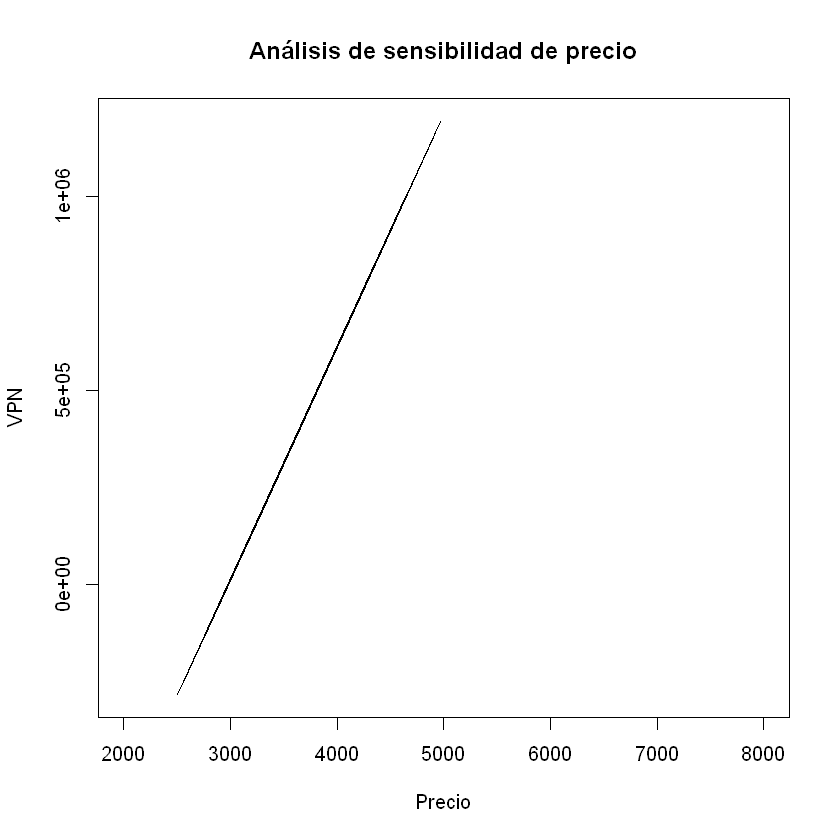

In [28]:
# Gráficas de sensibilidad de precios
plot(vec_precio,vec_vpn2,type="l",xlim=c(2000,8000),xlab = "Precio",ylab="VPN", main = "Análisis de sensibilidad de precio")